In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [238]:
data = pd.read_excel("medium-analiz.xlsx")
df = pd.DataFrame(data)

In [239]:
df.sample(5)

,Yazı Başlığı,Etiket,Okunma Sayısı,Zaman
79,Amerika’da Yaşam Şekli ve En Sevdiğim Gezi Rot...,Seyahat ve Kültür,154,Jun 2021
16,"Mecburiyet Olmadan, Mümküniyet Olmaz",Kişisel Gelişim,468,Jul 2018
95,Öfke Etiketini Kendinize Yapıştırmayın,İlişkiler ve Duygular,121,2018-03-01 00:00:00
201,İş Dünyasında Yaratıcılık Neden Bu Kadar Önemli?,İş ve Kariyer,1,2023-05-01 00:00:00
14,Kaçırmanın Memnuniyeti,Hayat Anlamı,488,Feb 2024


## Veri temizleme

In [240]:
df['Zaman'] = pd.to_datetime(df['Zaman'], errors='coerce')
df_filtered = df[df['Zaman'] <= '2024-01-01']
df_filtered.set_index('Zaman', inplace=True)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Yazı Başlığı   203 non-null    object        
 1   Etiket         201 non-null    object        
 2   Okunma Sayısı  203 non-null    int64         
 3   Zaman          203 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.5+ KB


## Veri görselleştirme

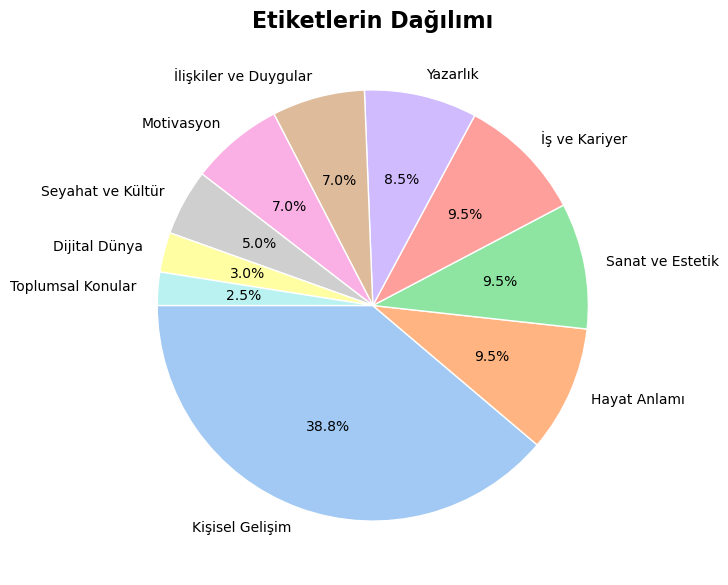

In [242]:
frekans = df['Etiket'].value_counts()

plt.figure(figsize=(10, 7))
colors = sns.color_palette('pastel')[0:len(frekans)] 
plt.pie(frekans, labels=frekans.index, autopct='%1.1f%%', colors=colors, startangle=180, wedgeprops=dict(edgecolor='w', linewidth=1))
plt.title('Etiketlerin Dağılımı', fontsize=16, fontweight='bold')
plt.show()

- yazıların büyük bir kısmını kişisel gelişim yazıları oluşturuyor
- Onu eşit bir şekilde, Sanat, Felsefe ve Kariyer takip ediyor

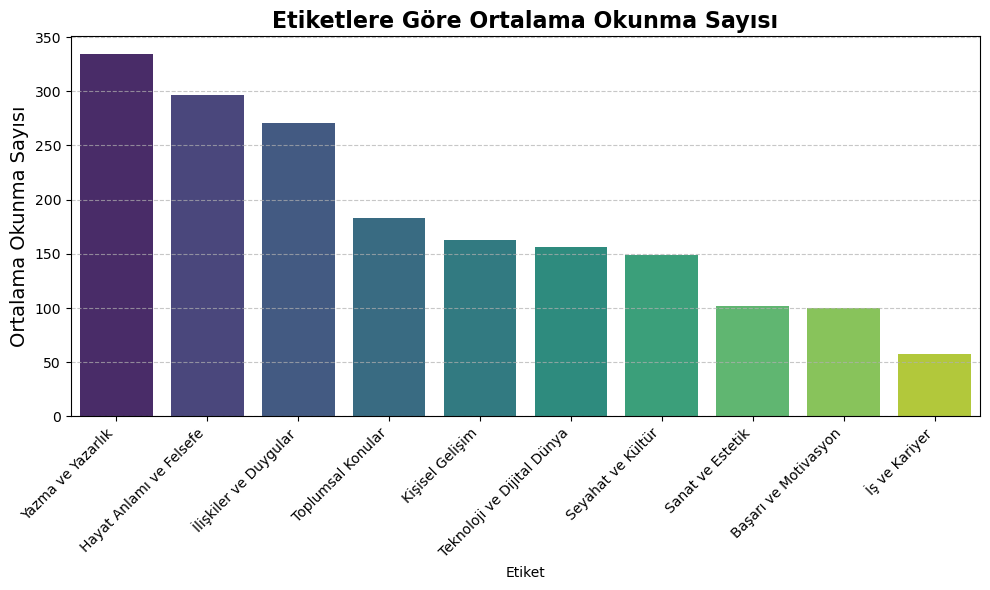

In [248]:

etkiler_avg_read = df.groupby('Etiket')['Okunma Sayısı'].mean().reset_index()
etkiler_avg_read = etkiler_avg_okunma.sort_values(by='Okunma Sayısı', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Etiket', y='Okunma Sayısı', data=etkiler_avg_read, palette='viridis')

plt.title('Etiketlere Göre Ortalama Okunma Sayısı', fontsize=16, fontweight='bold')
plt.ylabel('Ortalama Okunma Sayısı', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


- Yazarlık, Felsefe ve İlişkiler, en çok ilgi çeken alanlar olmuş
- Diğer taraftan Sanat, kültür ve kariyer daha az okunmuş

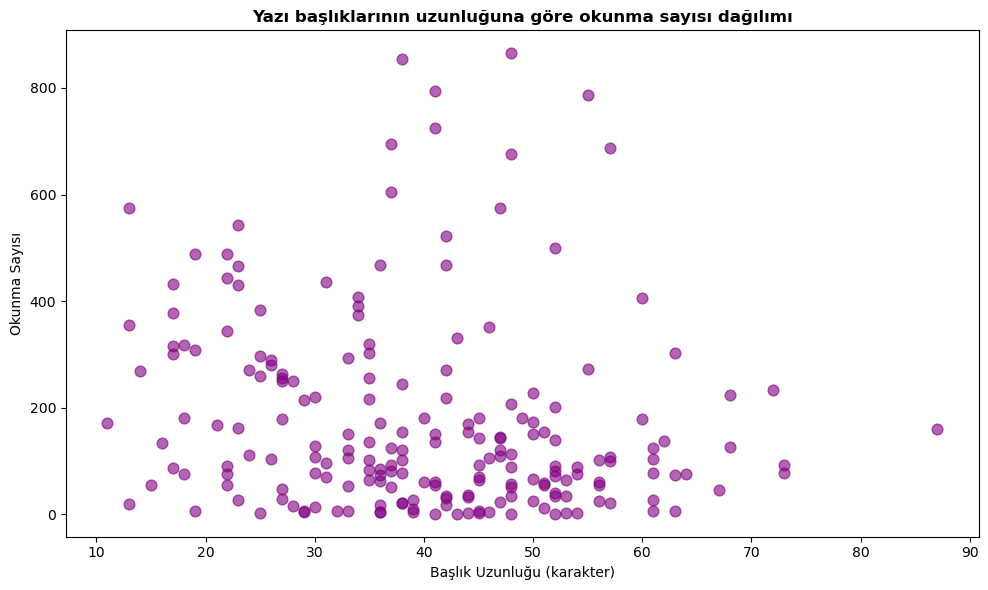

In [246]:
# Yazı başlıklarının uzunluğunu hesaplama
df['Başlık Uzunluğu'] = df['Yazı Başlığı'].apply(len)

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(df['Başlık Uzunluğu'], df['Okunma Sayısı'], color='purple', s = 60, alpha = 0.6)
plt.title('Yazı başlıklarının uzunluğuna göre okunma sayısı dağılımı', fontweight='bold')
plt.xlabel('Başlık Uzunluğu (karakter)')
plt.ylabel('Okunma Sayısı')
plt.tight_layout()
plt.show()

- Başlık uzunluğu çok uzun veya çok kısa olunca insanlar o yazıyı okumama eğilimi göstermiş
- İdeal bir yazının, 30-60 karakter aralığında olduğunu söyleyebiliriz

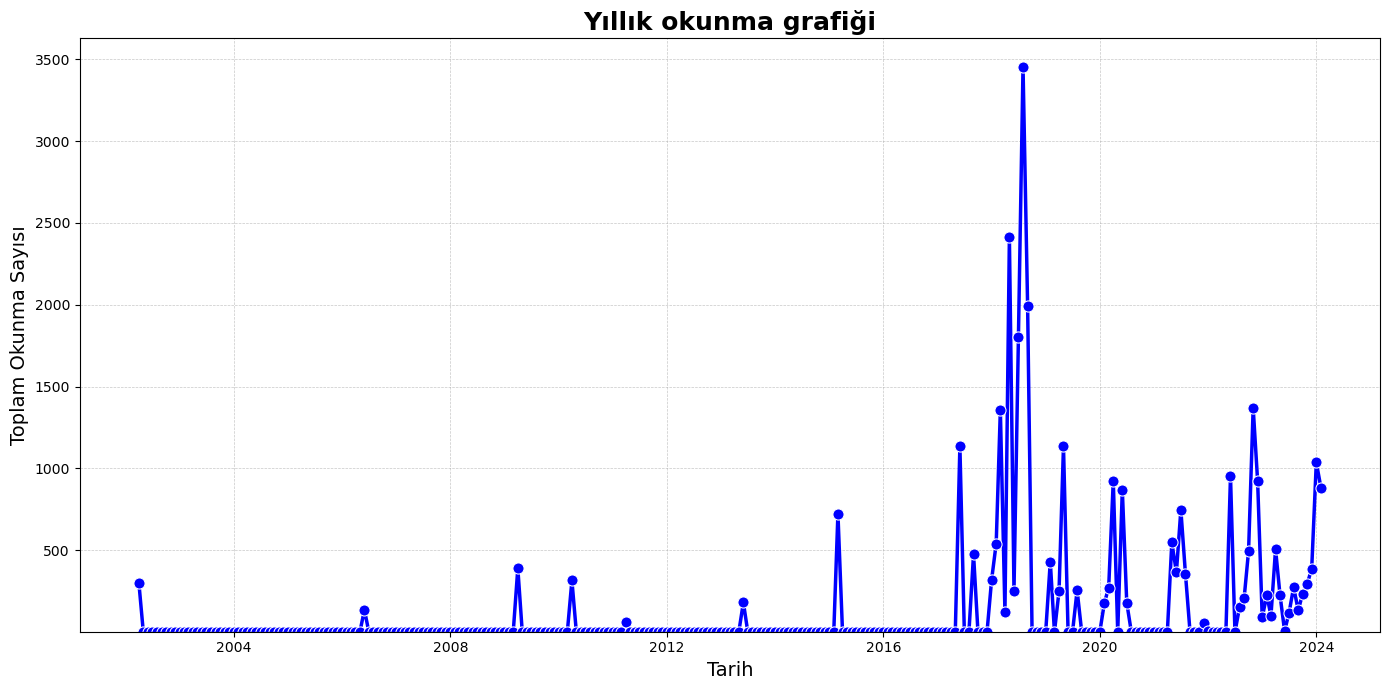

In [247]:

monthly_data = df_filtered.resample('M').sum()

# Grafik oluşturma
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Okunma Sayısı', marker='o', linestyle='-', color='blue', linewidth=2.5, markersize=8)
plt.title('Yıllık okunma grafiği', fontsize=18, fontweight='bold')
plt.xlabel('Tarih', fontsize=14)
plt.ylabel('Toplam Okunma Sayısı', fontsize=14)
plt.ylim(bottom=2)  # Y ekseninin alt limitini 1 olarak ayarlama
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

- 2019 yılından sonra (yani pandemiyle birlikte) Medium okunma oranlarının zirve yaptığını görüyoruz
- Her ne kadar istikrarlı bir yönelim olmasa da, eskiye göre insanlar çok daha fazla okuyor 